In [1]:
import numpy as np
import xarray as xr
import scipy.stats as st
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import requests
import os,errno
import sys
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER,LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import datetime as dt
import pandas as pd
import time
import urllib.request
import metpy.calc as mpcalc
import salem
import scipy.optimize as opt
import warnings
import geopy.distance
import matplotlib as mpl
from scipy.spatial import ConvexHull

from scipy.ndimage.measurements import label
from scipy.ndimage import binary_dilation

warnings.filterwarnings('ignore')

dir_data='/Users/lexihenny/'
dir3='/Volumes/My Passport/'
dir2='/Volumes/Extreme Pro/'

/var/folders/ql/bxfj9fdd15xfw55_bmktgrf80000gn/T/ipykernel_18341/3713109189.py:24: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import label


In [3]:
ds=xr.open_dataset(dir2+'global_lat_intercomparison.nc')

latsglobal_list_merra2_variable=ds['lats_list_merra2_variable'].values.tolist()
latsglobal_list_merra2_fixed=ds['lats_list_merra2_fixed'].values.tolist()
latsglobal_list_merra2_fixed_poleward=ds['lats_list_merra2_fixed_poleward'].values.tolist()

latsglobal_list_jra55_variable=ds['lats_list_jra55_variable'].values.tolist()
latsglobal_list_jra55_fixed=ds['lats_list_jra55_fixed'].values.tolist()
latsglobal_list_jra55_fixed_poleward=ds['lats_list_jra55_fixed_poleward'].values.tolist()

#lats_list_era5tp=ds['lats_list_era5tp'].values.tolist()
#lats_list_era5reid=ds['lats_list_era5reid'].values.tolist()
#lats_list_era5mk=ds['lats_list_era5mk'].values.tolist()

latsglobal_list_merra2lo=ds['lats_list_merra2lo'].values.tolist()
latsglobal_list_merra2cndl=ds['lats_list_merra2cndl'].values.tolist()
latsglobal_list_merra2ac=ds['lats_list_merra2ac'].values.tolist()

latsglobal_list_jra55gw=ds['lats_list_jra55gw'].values.tolist()

ds=xr.open_dataset(dir2+'global_lat_intercomparison_era5_CORRECTED.nc')
latsglobal_list_era5_variable=ds['lats_list_era5_variable'].values.tolist()
latsglobal_list_era5_fixed=ds['lats_list_era5_fixed'].values.tolist()
latsglobal_list_era5_fixed_poleward=ds['lats_list_era5_fixed_poleward'].values.tolist()


ds=xr.open_dataset(dir2+'global_lat_intercomparison_era5artmip_CORRECTED.nc')
latsglobal_list_era5tp=ds['lats_list_era5tp'].values.tolist()
latsglobal_list_era5reid=ds['lats_list_era5reid'].values.tolist()
latsglobal_list_era5mk=ds['lats_list_era5mk'].values.tolist()


ds=xr.open_dataset(dir2+'land_lat_intercomparison.nc')

latsland_list_era5_variable=ds['lats_list_era5_variable'].values.tolist()
latsland_list_era5_fixed=ds['lats_list_era5_fixed'].values.tolist()
latsland_list_era5_fixed_poleward=ds['lats_list_era5_fixed_poleward'].values.tolist()
print(latsland_list_era5_fixed)

latsland_list_merra2_variable=ds['lats_list_merra2_variable'].values.tolist()
latsland_list_merra2_fixed=ds['lats_list_merra2_fixed'].values.tolist()
latsland_list_merra2_fixed_poleward=ds['lats_list_merra2_fixed_poleward'].values.tolist()

latsland_list_jra55_variable=ds['lats_list_jra55_variable'].values.tolist()
latsland_list_jra55_fixed=ds['lats_list_jra55_fixed'].values.tolist()
latsland_list_jra55_fixed_poleward=ds['lats_list_jra55_fixed_poleward'].values.tolist()

#lats_list_era5tp=ds['lats_list_era5tp'].values.tolist()
#lats_list_era5reid=ds['lats_list_era5reid'].values.tolist()
#lats_list_era5mk=ds['lats_list_era5mk'].values.tolist()

latsland_list_merra2lo=ds['lats_list_merra2lo'].values.tolist()
latsland_list_merra2cndl=ds['lats_list_merra2cndl'].values.tolist()
latsland_list_merra2ac=ds['lats_list_merra2ac'].values.tolist()

latsland_list_jra55gw=ds['lats_list_jra55gw'].values.tolist()

ds=xr.open_dataset(dir2+'land_lat_intercomparison_era5artmip_CORRECTED.nc')
latsland_list_era5tp=ds['lats_list_era5tp'].values.tolist()
latsland_list_era5reid=ds['lats_list_era5reid'].values.tolist()
latsland_list_era5mk=ds['lats_list_era5mk'].values.tolist()

[36.955293501625746, 36.06302993031138, 37.24809558007459, 38.69812222705967, 38.40732805562392, 37.391762168398934, 36.19534876094036, 37.22707099334939, 36.793136040949605, 37.33659608511647, 36.78934050974899, 36.3607577330295, 36.564970892931534, 36.7261972374774, 36.39655955136871, 36.99993380958674, 35.94055581396367, 36.610668902109005, 36.08970715576756, 36.67314863987818, 35.72917749114591, 36.777096908627534, 37.54189210624969, 37.06186537472666, 36.603720453011235, 37.16571517937523, 36.420450483001176, 36.809020640251724, 36.54984630114135, 36.43117911166594, 36.548040051129306, 36.80170593803354, 36.57370639520415, 36.29277607911541, 35.9243222792361, 36.5292585214988, 35.97980346483744, 36.78465239834892, 37.12621043550634, 37.1319367670348, 35.60652493646184, 36.88126045798815, 36.522372964700324, 35.541754061104626, 36.64512569804246, 36.891490227750865, 36.42113763629938, 35.38170252091797, 37.34978312028909, 37.591438134256386, 37.11621336820709, 36.48088221460466, 35

[37.062006718534576, 37.77324501700579, 37.412030925610296, 36.98839621972635, 37.42992718218156, 37.93883515002533, 37.61764046521511, 37.353493762748585, 38.08705839466398, 37.73995443705848, 37.781864777579536, 37.57896469451674, 37.25645604993272, 37.5676480096669, 37.262796051716755, 37.156770856630466, 37.10083673018635, 37.006828625606055, 37.50105585859237, 38.05071799611004, 37.793719574458756, 37.78593402167327, 37.73768949922634, 37.25867791760094, 37.26791671669491, 37.63876884685245, 37.86887063097165, 37.82446346473105, 38.09000623014405, 36.698340869544054, 37.542171637004, 37.73544150911237, 37.28603161393918, 37.65518458698931, 37.48950326390921, 37.4015766654375, 37.81296939334289, 38.082305579488526, 37.71628828423553, 38.09755783912494]


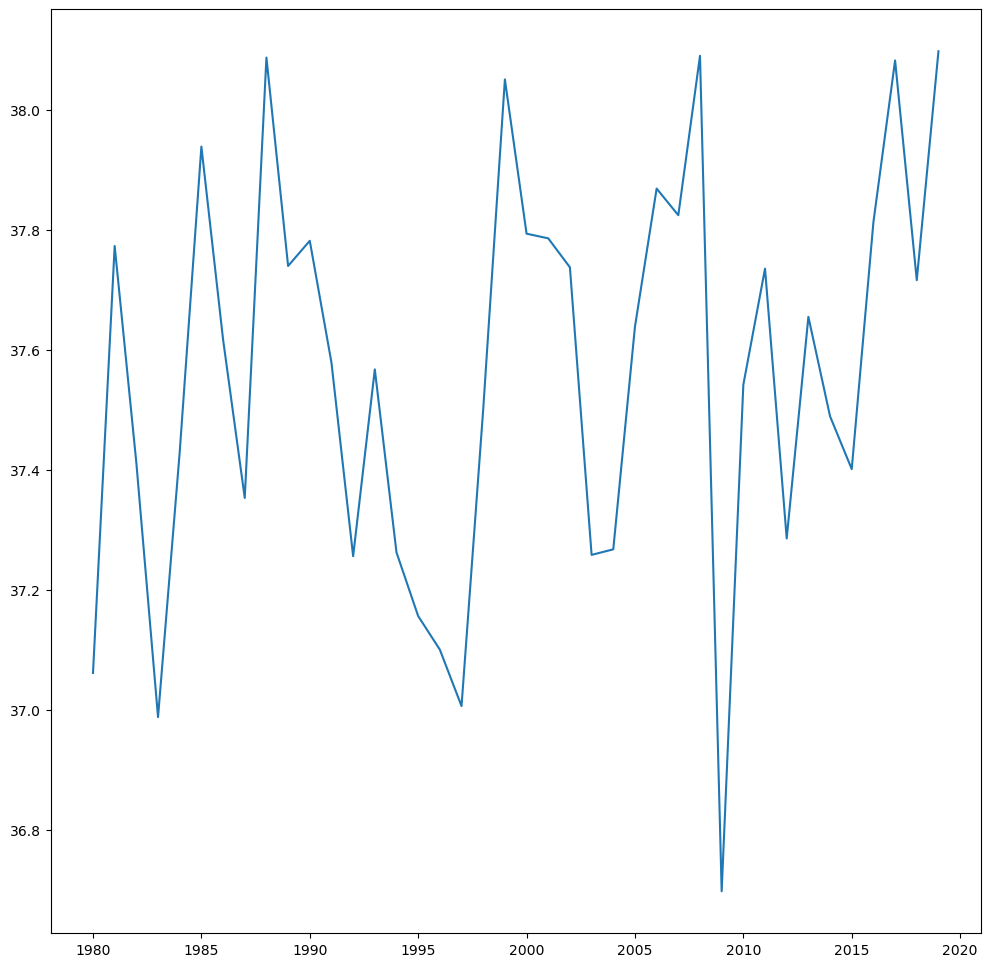

In [4]:
print(lats_list_merra2ac)
fig=plt.figure(figsize=(12,12))
ax=plt.subplot(1,1,1)
ax.plot(np.arange(1980,2020,1),lats_list_merra2ac)
plt.show()

In [2]:
ds=xr.open_dataset(dir_data+'ar_chars_original_era5mk.nc')
nums_list_era5mk=ds['nums_list_field'].values.tolist()
areas_list_era5mk=ds['areas_list_field'].values.tolist()
lats_list_era5mk=ds['lats_list_field'].values.tolist()
lats_list_era5mk_nh=ds['lats_list_field_nh'].values.tolist()
lats_list_era5mk_sh=[x*-1. for x in ds['lats_list_field_sh'].values.tolist()]

ds=xr.open_dataset(dir_data+'ar_chars_original_era5tp.nc')
nums_list_era5tp=ds['nums_list_field'].values.tolist()
areas_list_era5tp=ds['areas_list_field'].values.tolist()
lats_list_era5tp=ds['lats_list_field'].values.tolist()
lats_list_era5tp_nh=ds['lats_list_field_nh'].values.tolist()
lats_list_era5tp_sh=[x*-1. for x in ds['lats_list_field_sh'].values.tolist()]

ds=xr.open_dataset(dir_data+'ar_chars_original_era5reid.nc')
nums_list_era5reid=ds['nums_list_field'].values.tolist()
areas_list_era5reid=ds['areas_list_field'].values.tolist()
lats_list_era5reid=ds['lats_list_field'].values.tolist()
lats_list_era5reid_nh=ds['lats_list_field_nh'].values.tolist()
lats_list_era5reid_sh=[x*-1. for x in ds['lats_list_field_sh'].values.tolist()]


ds=xr.open_dataset(dir_data+'ar_chars_original_merra2lo.nc')
nums_list_merra2lo=ds['nums_list_field'].values.tolist()
areas_list_merra2lo=ds['areas_list_field'].values.tolist()
lats_list_merra2lo=ds['lats_list_field'].values.tolist()
lats_list_merra2lo_nh=ds['lats_list_field_nh'].values.tolist()
lats_list_merra2lo_sh=[x*-1. for x in ds['lats_list_field_sh'].values.tolist()]

ds=xr.open_dataset(dir_data+'ar_chars_original_merra2ac.nc')
nums_list_merra2ac=ds['nums_list_field'].values.tolist()
areas_list_merra2ac=ds['areas_list_field'].values.tolist()
lats_list_merra2ac=ds['lats_list_field'].values.tolist()
lats_list_merra2ac_nh=ds['lats_list_field_nh'].values.tolist()
lats_list_merra2ac_sh=[x*-1. for x in ds['lats_list_field_sh'].values.tolist()]

ds=xr.open_dataset(dir_data+'ar_chars_original_merra2cndl.nc')
nums_list_merra2cndl=ds['nums_list_field'].values.tolist()
areas_list_merra2cndl=ds['areas_list_field'].values.tolist()
lats_list_merra2cndl=ds['lats_list_field'].values.tolist()
lats_list_merra2cndl_nh=ds['lats_list_field_nh'].values.tolist()
lats_list_merra2cndl_sh=[x*-1. for x in ds['lats_list_field_sh'].values.tolist()]


ds=xr.open_dataset(dir_data+'ar_chars_original_jra55gw.nc')
nums_list_jra55gw=ds['nums_list_field'].values.tolist()
areas_list_jra55gw=ds['areas_list_field'].values.tolist()
lats_list_jra55gw=ds['lats_list_field'].values.tolist()
lats_list_jra55gw_nh=ds['lats_list_field_nh'].values.tolist()
lats_list_jra55gw_sh=[x*-1. for x in ds['lats_list_field_sh'].values.tolist()]


ds=xr.open_dataset(dir2+'ar_chars_original_merra2.nc')#era5, merra2 

nums_list_merra2_variable=ds['nums_list_merra2_polar'].values.tolist()
areas_list_merra2_variable=ds['areas_list_merra2_polar'].values.tolist()
lats_list_merra2_variable=ds['lats_list_merra2_polar'].values.tolist()
lats_list_merra2_variable_nh=ds['lats_list_merra2_polar_nh'].values.tolist()
lats_list_merra2_variable_sh=[x*-1. for x in ds['lats_list_merra2_polar_sh'].values.tolist()]

nums_list_merra2_fixed=ds['nums_list_merra2_fixed'].values.tolist()
areas_list_merra2_fixed=ds['areas_list_merra2_fixed'].values.tolist()
lats_list_merra2_fixed=ds['lats_list_merra2_fixed'].values.tolist()
lats_list_merra2_fixed_nh=ds['lats_list_merra2_fixed_nh'].values.tolist()
lats_list_merra2_fixed_sh=[x*-1. for x in ds['lats_list_merra2_fixed_sh'].values.tolist()]

nums_list_merra2_fixed_poleward=ds['nums_list_merra2_fixed_poleward'].values.tolist()
areas_list_merra2_fixed_poleward=ds['areas_list_merra2_fixed_poleward'].values.tolist()
lats_list_merra2_fixed_poleward=ds['lats_list_merra2_fixed_poleward'].values.tolist()
lats_list_merra2_fixed_poleward_nh=ds['lats_list_merra2_fixed_poleward_nh'].values.tolist()
lats_list_merra2_fixed_poleward_sh=[x*-1. for x in ds['lats_list_merra2_fixed_poleward_sh'].values.tolist()]


ds=xr.open_dataset(dir2+'ar_chars_original_era5.nc')#era5, merra2 

nums_list_era5_variable=ds['nums_list_era5_polar'].values.tolist()
areas_list_era5_variable=ds['areas_list_era5_polar'].values.tolist()
lats_list_era5_variable=ds['lats_list_era5_polar'].values.tolist()
lats_list_era5_variable_nh=ds['lats_list_era5_polar_nh'].values.tolist()
lats_list_era5_variable_sh=[x*-1. for x in ds['lats_list_era5_polar_sh'].values.tolist()]

nums_list_era5_fixed=ds['nums_list_era5_fixed'].values.tolist()
areas_list_era5_fixed=ds['areas_list_era5_fixed'].values.tolist()
lats_list_era5_fixed=ds['lats_list_era5_fixed'].values.tolist()
lats_list_era5_fixed_nh=ds['lats_list_era5_fixed_nh'].values.tolist()
lats_list_era5_fixed_sh=[x*-1. for x in ds['lats_list_era5_fixed_sh'].values.tolist()]

nums_list_era5_fixed_poleward=ds['nums_list_era5_fixed_poleward'].values.tolist()
areas_list_era5_fixed_poleward=ds['areas_list_era5_fixed_poleward'].values.tolist()
lats_list_era5_fixed_poleward=ds['lats_list_era5_fixed_poleward'].values.tolist()
lats_list_era5_fixed_poleward_nh=ds['lats_list_era5_fixed_poleward_nh'].values.tolist()
lats_list_era5_fixed_poleward_sh=[x*-1. for x in ds['lats_list_era5_fixed_poleward_sh'].values.tolist()]

ds=xr.open_dataset(dir2+'ar_chars_original_jra55.nc')#era5, merra2 

nums_list_jra55_variable=ds['nums_list_jra55_polar'].values.tolist()
areas_list_jra55_variable=ds['areas_list_jra55_polar'].values.tolist()
lats_list_jra55_variable=ds['lats_list_jra55_polar'].values.tolist()
lats_list_jra55_variable_nh=ds['lats_list_jra55_polar_nh'].values.tolist()
lats_list_jra55_variable_sh=[x*-1. for x in ds['lats_list_jra55_polar_sh'].values.tolist()]

nums_list_jra55_fixed=ds['nums_list_jra55_fixed'].values.tolist()
areas_list_jra55_fixed=ds['areas_list_jra55_fixed'].values.tolist()
lats_list_jra55_fixed=ds['lats_list_jra55_fixed'].values.tolist()
lats_list_jra55_fixed_nh=ds['lats_list_jra55_fixed_nh'].values.tolist()
lats_list_jra55_fixed_sh=[x*-1. for x in ds['lats_list_jra55_fixed_sh'].values.tolist()]

nums_list_jra55_fixed_poleward=ds['nums_list_jra55_fixed_poleward'].values.tolist()
areas_list_jra55_fixed_poleward=ds['areas_list_jra55_fixed_poleward'].values.tolist()
lats_list_jra55_fixed_poleward=ds['lats_list_jra55_fixed_poleward'].values.tolist()
lats_list_jra55_fixed_poleward_nh=ds['lats_list_jra55_fixed_poleward_nh'].values.tolist()
lats_list_jra55_fixed_poleward_sh=[x*-1. for x in ds['lats_list_jra55_fixed_poleward_sh'].values.tolist()]

FileNotFoundError: [Errno 2] No such file or directory: b'/Volumes/Extreme Pro/ar_chars_original_merra2.nc'

In [5]:
sigs_list=[]

new_era5_variable=lats_list_era5_variable
new_era5_fixed=lats_list_era5_fixed
new_era5_fixed_poleward=lats_list_era5_fixed_poleward

new_merra2_variable=lats_list_merra2_variable
new_merra2_fixed=lats_list_merra2_fixed
new_merra2_fixed_poleward=lats_list_merra2_fixed_poleward

new_jra55_variable=lats_list_jra55_variable
new_jra55_fixed=lats_list_jra55_fixed
new_jra55_fixed_poleward=lats_list_jra55_fixed_poleward

new_era5tp=lats_list_era5tp
new_era5reid=lats_list_era5reid
new_era5mk=lats_list_era5mk

new_merra2lo=lats_list_merra2lo
new_merra2cndl=lats_list_merra2cndl
new_merra2ac=lats_list_merra2ac

new_jra55gw=lats_list_jra55gw

sigs_variable=[]
sigs_fixed=[]
sigs_fixed_poleward=[]
change_list=[]
change_variable=[]
change_fixed=[]
change_fixed_poleward=[]
slopes_local=[]
sigs_local=[]
yrs=np.arange(1980,2024,1)
count=0
test=new_era5_variable[40:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_variable.append(change)
sigs_variable.append(r[3])
    
test=new_era5_fixed[40:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_era5_fixed_poleward[40:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])

test=new_jra55_variable[22:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_variable.append(change)
sigs_variable.append(r[3])

test=new_jra55_fixed[22:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_jra55_fixed_poleward[22:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])

test=new_merra2_variable
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_variable.append(change)
sigs_variable.append(r[3])

test=new_merra2_fixed
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_merra2_fixed_poleward
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])

change_mean_variable=float(sum(change_variable))/3.
change_mean_fixed=float(sum(change_fixed))/3.
change_mean_fixed_poleward=float(sum(change_fixed_poleward))/3.

yrs=np.arange(1980,2020,1)
r=st.linregress(yrs,new_era5tp)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_era5reid)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_era5mk)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_merra2lo)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_merra2cndl)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_merra2ac)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_jra55gw)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

if len([x for x in sigs_variable if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed_poleward if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)

change_list.append(change_mean_variable)
change_list.append(change_mean_fixed)
change_list.append(change_mean_fixed_poleward)
change_list_lat_within=change_list
sigs_list_lat_within=sigs_list

In [6]:
sigs_list=[]

new_era5_variable=lats_list_era5_variable_nh
new_era5_fixed=lats_list_era5_fixed_nh
new_era5_fixed_poleward=lats_list_era5_fixed_poleward_nh

new_merra2_variable=lats_list_merra2_variable_nh
new_merra2_fixed=lats_list_merra2_fixed_nh
new_merra2_fixed_poleward=lats_list_merra2_fixed_poleward_nh

new_jra55_variable=lats_list_jra55_variable_nh
new_jra55_fixed=lats_list_jra55_fixed_nh
new_jra55_fixed_poleward=lats_list_jra55_fixed_poleward_nh

new_era5tp=lats_list_era5tp_nh
new_era5reid=lats_list_era5reid_nh
new_era5mk=lats_list_era5mk_nh

new_merra2lo=lats_list_merra2lo_nh
new_merra2cndl=lats_list_merra2cndl_nh
new_merra2ac=lats_list_merra2ac_nh

new_jra55gw=lats_list_jra55gw_nh

sigs_variable=[]
sigs_fixed=[]
sigs_fixed_poleward=[]
change_list=[]
change_variable=[]
change_fixed=[]
change_fixed_poleward=[]
slopes_local=[]
sigs_local=[]
yrs=np.arange(1980,2024,1)
count=0
test=new_era5_variable[40:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_variable.append(change)
sigs_variable.append(r[3])
    
test=new_era5_fixed[40:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_era5_fixed_poleward[40:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])

test=new_jra55_variable[22:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_variable.append(change)
sigs_variable.append(r[3])

test=new_jra55_fixed[22:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_jra55_fixed_poleward[22:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])

test=new_merra2_variable
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_variable.append(change)
sigs_variable.append(r[3])

test=new_merra2_fixed
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_merra2_fixed_poleward
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])

change_mean_variable=float(sum(change_variable))/3.
change_mean_fixed=float(sum(change_fixed))/3.
change_mean_fixed_poleward=float(sum(change_fixed_poleward))/3.

yrs=np.arange(1980,2020,1)
r=st.linregress(yrs,new_era5tp)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_era5reid)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_era5mk)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_merra2lo)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_merra2cndl)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_merra2ac)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_jra55gw)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

if len([x for x in sigs_variable if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed_poleward if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)

change_list.append(change_mean_variable)
change_list.append(change_mean_fixed)
change_list.append(change_mean_fixed_poleward)
change_list_lat_within_nh=change_list
sigs_list_lat_within_nh=sigs_list

In [7]:
sigs_list=[]

new_era5_variable=lats_list_era5_variable_sh
new_era5_fixed=lats_list_era5_fixed_sh
new_era5_fixed_poleward=lats_list_era5_fixed_poleward_sh

new_merra2_variable=lats_list_merra2_variable_sh
new_merra2_fixed=lats_list_merra2_fixed_sh
new_merra2_fixed_poleward=lats_list_merra2_fixed_poleward_sh

new_jra55_variable=lats_list_jra55_variable_sh
new_jra55_fixed=lats_list_jra55_fixed_sh
new_jra55_fixed_poleward=lats_list_jra55_fixed_poleward_sh

new_era5tp=lats_list_era5tp_sh
new_era5reid=lats_list_era5reid_sh
new_era5mk=lats_list_era5mk_sh

new_merra2lo=lats_list_merra2lo_sh
new_merra2cndl=lats_list_merra2cndl_sh
new_merra2ac=lats_list_merra2ac_sh

new_jra55gw=lats_list_jra55gw_sh

sigs_variable=[]
sigs_fixed=[]
sigs_fixed_poleward=[]
change_list=[]
change_variable=[]
change_fixed=[]
change_fixed_poleward=[]
slopes_local=[]
sigs_local=[]
yrs=np.arange(1980,2024,1)
count=0
test=new_era5_variable[40:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_variable.append(change)
sigs_variable.append(r[3])
    
test=new_era5_fixed[40:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_era5_fixed_poleward[40:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])

test=new_jra55_variable[22:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_variable.append(change)
sigs_variable.append(r[3])

test=new_jra55_fixed[22:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_jra55_fixed_poleward[22:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])

test=new_merra2_variable
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_variable.append(change)
sigs_variable.append(r[3])

test=new_merra2_fixed
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_merra2_fixed_poleward
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])

change_mean_variable=float(sum(change_variable))/3.
change_mean_fixed=float(sum(change_fixed))/3.
change_mean_fixed_poleward=float(sum(change_fixed_poleward))/3.

yrs=np.arange(1980,2020,1)
r=st.linregress(yrs,new_era5tp)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_era5reid)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_era5mk)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_merra2lo)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_merra2cndl)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_merra2ac)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_jra55gw)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

if len([x for x in sigs_variable if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed_poleward if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)

change_list.append(change_mean_variable)
change_list.append(change_mean_fixed)
change_list.append(change_mean_fixed_poleward)
change_list_lat_within_sh=change_list
sigs_list_lat_within_sh=sigs_list

In [8]:
sigs_list=[]

new_era5_variable=latsland_list_era5_variable
new_era5_fixed=latsland_list_era5_fixed
new_era5_fixed_poleward=latsland_list_era5_fixed_poleward

new_merra2_variable=latsland_list_merra2_variable
new_merra2_fixed=latsland_list_merra2_fixed
new_merra2_fixed_poleward=latsland_list_merra2_fixed_poleward

new_jra55_variable=latsland_list_jra55_variable
new_jra55_fixed=latsland_list_jra55_fixed
new_jra55_fixed_poleward=latsland_list_jra55_fixed_poleward

new_era5tp=latsland_list_era5tp
new_era5reid=latsland_list_era5reid
new_era5mk=latsland_list_era5mk

new_merra2lo=latsland_list_merra2lo
new_merra2cndl=latsland_list_merra2cndl
new_merra2ac=latsland_list_merra2ac

new_jra55gw=latsland_list_jra55gw

sigs_variable=[]
sigs_fixed=[]
sigs_fixed_poleward=[]
change_list=[]
change_variable=[]
change_fixed=[]
change_fixed_poleward=[]
slopes_local=[]
sigs_local=[]
yrs=np.arange(1980,2024,1)
count=0
test=new_era5_variable[40:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_variable.append(change)
sigs_variable.append(r[3])
    
test=new_era5_fixed[40:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_era5_fixed_poleward[40:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])

test=new_jra55_variable[22:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_variable.append(change)
sigs_variable.append(r[3])

test=new_jra55_fixed[22:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_jra55_fixed_poleward[22:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])

test=new_merra2_variable
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_variable.append(change)
sigs_variable.append(r[3])

test=new_merra2_fixed
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_merra2_fixed_poleward
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])

change_mean_variable=float(sum(change_variable))/3.
change_mean_fixed=float(sum(change_fixed))/3.
change_mean_fixed_poleward=float(sum(change_fixed_poleward))/3.

yrs=np.arange(1980,2020,1)
r=st.linregress(yrs,new_era5tp)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_era5reid)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_era5mk)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_merra2lo)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_merra2cndl)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_merra2ac)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_jra55gw)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

if len([x for x in sigs_variable if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed_poleward if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)

change_list.append(change_mean_variable)
change_list.append(change_mean_fixed)
change_list.append(change_mean_fixed_poleward)
change_list_lat_land=change_list
sigs_list_lat_land=sigs_list

In [9]:
sigs_list=[]

new_era5_variable=latsglobal_list_era5_variable
new_era5_fixed=latsglobal_list_era5_fixed
new_era5_fixed_poleward=latsglobal_list_era5_fixed_poleward

new_merra2_variable=latsglobal_list_merra2_variable
new_merra2_fixed=latsglobal_list_merra2_fixed
new_merra2_fixed_poleward=latsglobal_list_merra2_fixed_poleward

new_jra55_variable=latsglobal_list_jra55_variable
new_jra55_fixed=latsglobal_list_jra55_fixed
new_jra55_fixed_poleward=latsglobal_list_jra55_fixed_poleward

new_era5tp=latsglobal_list_era5tp
new_era5reid=latsglobal_list_era5reid
new_era5mk=latsglobal_list_era5mk

new_merra2lo=latsglobal_list_merra2lo
new_merra2cndl=latsglobal_list_merra2cndl
new_merra2ac=latsglobal_list_merra2ac

new_jra55gw=latsglobal_list_jra55gw

sigs_variable=[]
sigs_fixed=[]
sigs_fixed_poleward=[]
change_list=[]
change_variable=[]
change_fixed=[]
change_fixed_poleward=[]
slopes_local=[]
sigs_local=[]
yrs=np.arange(1980,2024,1)
count=0
test=new_era5_variable[40:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_variable.append(change)
sigs_variable.append(r[3])
    
test=new_era5_fixed[40:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_era5_fixed_poleward[40:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])

test=new_jra55_variable[22:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_variable.append(change)
sigs_variable.append(r[3])

test=new_jra55_fixed[22:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_jra55_fixed_poleward[22:]
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])

test=new_merra2_variable
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_variable.append(change)
sigs_variable.append(r[3])

test=new_merra2_fixed
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed.append(change)
sigs_fixed.append(r[3])

test=new_merra2_fixed_poleward
r=st.linregress(yrs,test)
change=r[0]*len(yrs)
change_fixed_poleward.append(change)
sigs_fixed_poleward.append(r[3])

change_mean_variable=float(sum(change_variable))/3.
change_mean_fixed=float(sum(change_fixed))/3.
change_mean_fixed_poleward=float(sum(change_fixed_poleward))/3.

yrs=np.arange(1980,2020,1)
r=st.linregress(yrs,new_era5tp)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_era5reid)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_era5mk)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_merra2lo)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_merra2cndl)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_merra2ac)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

r=st.linregress(yrs,new_jra55gw)
sigs_list.append(r[3])
change1=r[0]*len(yrs)
change_list.append(change1)

if len([x for x in sigs_variable if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)
    
if len([x for x in sigs_fixed_poleward if x<=0.03])>=2:
    sigs_list.append(0.01)
else:
    sigs_list.append(1)

change_list.append(change_mean_variable)
change_list.append(change_mean_fixed)
change_list.append(change_mean_fixed_poleward)
change_list_lat_global=change_list
sigs_list_lat_global=sigs_list

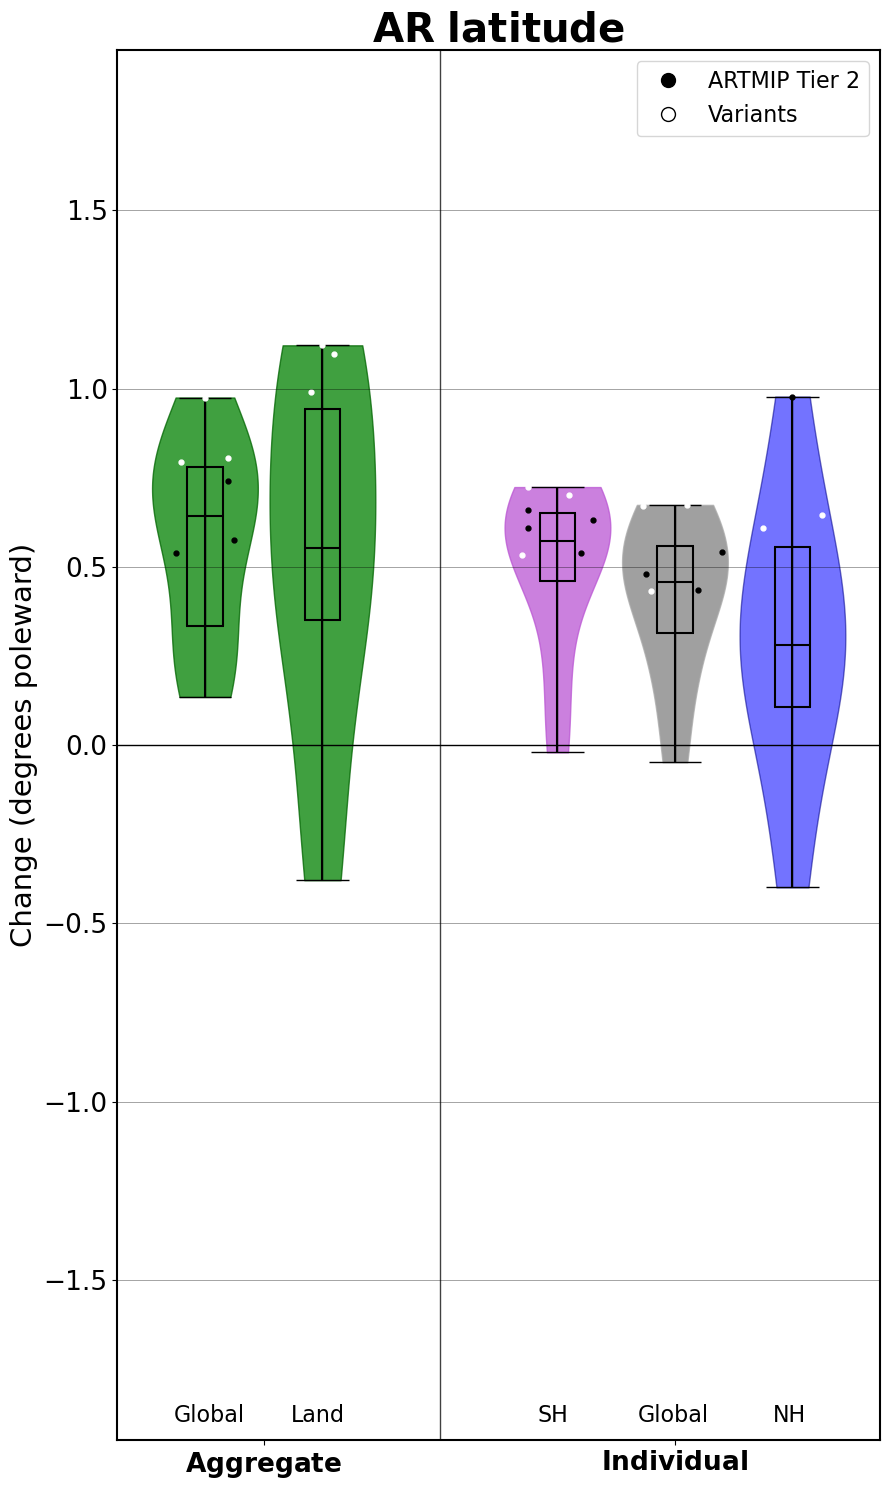

In [30]:
#fig=plt.figure(figsize=(12,12))
#ax=plt.subplot(1,1,1)

def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')
    
data=[change_list_lat_global,change_list_lat_land,[np.nan]*9,change_list_lat_within_sh,change_list_lat_within,change_list_lat_within_nh]

quartile1_lat_global=np.percentile(change_list_lat_global,25)
quartile2_lat_global=np.percentile(change_list_lat_global,50)
quartile3_lat_global=np.percentile(change_list_lat_global,75)

quartile1_lat_land=np.percentile(change_list_lat_land,25)
quartile2_lat_land=np.percentile(change_list_lat_land,50)
quartile3_lat_land=np.percentile(change_list_lat_land,75)

quartile1_lat_within_sh=np.percentile(change_list_lat_within_sh,25)
quartile2_lat_within_sh=np.percentile(change_list_lat_within_sh,50)
quartile3_lat_within_sh=np.percentile(change_list_lat_within_sh,75)

quartile1_lat_within=np.percentile(change_list_lat_within,25)
quartile2_lat_within=np.percentile(change_list_lat_within,50)
quartile3_lat_within=np.percentile(change_list_lat_within,75)

quartile1_lat_within_nh=np.percentile(change_list_lat_within_nh,25)
quartile2_lat_within_nh=np.percentile(change_list_lat_within_nh,50)
quartile3_lat_within_nh=np.percentile(change_list_lat_within_nh,75)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,15))

#positions=[1,2,4,5,7,8,10,11]
#plt.xticks(positions, ['A', 'B', 'C','D','E','F','G','H']) # Set the xticks to the desired positions and labels

ax.set_ylabel('Change (degrees poleward)',fontsize=21)
#ax.violinplot(change_list)
parts = ax.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=True,widths=0.9)
count=0
N=3
a=0.75
for pc in parts['bodies']:
    
    if count in [0,1]:
        pc.set_facecolor('g')
        pc.set_edgecolor('darkgreen')
        pc.set_alpha(a)
    
    if count in [3]:
        pc.set_facecolor('mediumorchid')
        pc.set_edgecolor('mediumorchid')
        pc.set_alpha(a)
    if count in [4]:
        pc.set_facecolor('grey')
        pc.set_edgecolor('darkgray')
        pc.set_alpha(a)
    if count in [5]:
        pc.set_facecolor('b')
        pc.set_edgecolor('darkblue')
        pc.set_alpha(a-0.2)

    count=count+1


parts['cmaxes'].set_color('k')
parts['cmins'].set_color('k')
parts['cbars'].set_color('k')

parts['cmaxes'].set_linewidth(1)
parts['cmins'].set_linewidth(1)
parts['cbars'].set_linewidth(1)
#quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75],axis=1)
quartile1,medians,quartile3=[quartile1_lat_global,quartile1_lat_land,np.nan,quartile1_lat_within_sh,
                             quartile1_lat_within,quartile1_lat_within_nh],[
    quartile2_lat_global,quartile2_lat_land,np.nan,quartile2_lat_within_sh,
                             quartile2_lat_within,quartile2_lat_within_nh],[
    quartile3_lat_global,quartile3_lat_land,np.nan,quartile3_lat_within_sh,
                             quartile3_lat_within,quartile3_lat_within_nh
]

whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

whiskers_min=[min(change_list_lat_global),min(change_list_lat_land),np.nan,min(change_list_lat_within_sh),
              min(change_list_lat_within),min(change_list_lat_within_nh)]
whiskers_max=[max(change_list_lat_global),max(change_list_lat_land),np.nan,max(change_list_lat_within_sh),
              max(change_list_lat_within),max(change_list_lat_within_nh)]

inds = np.arange(1, len(medians) + 1)
#ax.scatter(inds, medians, marker='o', color='white', s=200, zorder=3)

#ax.scatter(inds, medians, marker='o', color='None',edgecolor='k',mew=2, s=150, zorder=3)
#ax.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=14)

#ax.vlines(inds[0], quartile1[0], quartile3[0], color='b', linestyle='-', lw=42,alpha=1)
#ax.vlines(inds[1], quartile1[1], quartile3[1], color='b', linestyle='-', lw=42,alpha=1)
#ax.vlines(inds[3], quartile1[3], quartile3[3], color='g', linestyle='-', lw=42,alpha=1)
#ax.vlines(inds[4], quartile1[4], quartile3[4], color='g', linestyle='-', lw=42,alpha=1)

#ax.vlines(inds[6], quartile1[6], quartile3[6], color='mediumorchid', linestyle='-', lw=42,alpha=1)
#ax.vlines(inds[7], quartile1[7], quartile3[7], color='mediumorchid', linestyle='-', lw=42,alpha=1)
#ax.vlines(inds[9], quartile1[9], quartile3[9], color=plt.cm.Oranges(np.linspace(0,1,10))[5], linestyle='-', lw=42,alpha=1)
#ax.vlines(inds[10], quartile1[10], quartile3[10], color=plt.cm.Oranges(np.linspace(0,1,10))[5], linestyle='-', lw=42,alpha=1)


ax.vlines([x-0.15 for x in inds], quartile1, quartile3, color='k', linestyle='-', lw=1.5)
ax.vlines([x+0.15 for x in inds], quartile1, quartile3, color='k', linestyle='-', lw=1.5)
ax.hlines(quartile1,[x-0.159 for x in inds], [x+0.159 for x in inds], color='k', linestyle='-', lw=1.5)
ax.hlines(quartile3,[x-0.159 for x in inds], [x+0.159 for x in inds], color='k', linestyle='-', lw=1.5)
ax.hlines(medians,[x-0.152 for x in inds], [x+0.152 for x in inds], color='k', linestyle='-', lw=1.5)

ax.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1.5)
ax.set_title(r'$\bf{AR}$'+' '+r'$\bf{latitude}$',fontsize=29,pad=5)
ax.tick_params(labelsize=19)
plt.axhline(y=0,color='k',linewidth=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
#ax.grid(True,linewidth=2)

#ax.plot(1,medians[0],marker='o',color='None',markeredgecolor='k',mew=2,markersize=15,zorder=5)
#for change in change_list_ivt[:-3]:
#    ax.plot(1,change,marker='_',color='k',markersize=15,mew=2)
#for change in change_list_ivt[-3:]:
#    ax.plot(1,change,marker='o',color='w',markersize=5,zorder=5)
#for change in change_list_iwv[-3:]:
#    ax.plot(2,change,marker='o',color='w',markersize=5,zorder=5)
#for change in change_list_s[-3:]:
#    ax.plot(3,change,marker='o',color='w',markersize=5,zorder=5)
#for change in change_list_mfc[-3:]:
#    ax.plot(4,change,marker='o',color='w',markersize=5,zorder=5)

x=0.0675
plt.xticks([1.5,5],labels=[r'$\bf{Aggregate}$',r'$\bf{Individual}$'])
ax.text(0.8-x,-1.9,'Global',fontsize=16,rotation=0)
ax.text(1.8-x,-1.9,'Land',fontsize=16,rotation=0)

ax.text(3.9-x,-1.9,'SH',fontsize=16,rotation=0)
ax.text(4.75-x,-1.9,'Global',fontsize=16,rotation=0)
ax.text(5.9-x,-1.9,'NH',fontsize=16,rotation=0)

#ax.text(6.575-x,-20,'Global',fontsize=16,rotation=0)
#ax.text(7.72-x,-20,'Land',fontsize=16,rotation=0)

#ax.text(9.575-x,-20,'Global',fontsize=16,rotation=0)
#ax.text(10.72-x,-20,'Land',fontsize=16,rotation=0)

#ax.text(12.575-x,-20,'Global',fontsize=16,rotation=0)
#ax.text(13.72-x,-19.9,'Land',fontsize=16,rotation=0)

#plt.yticks([-9,-6,-3,0,3,6,9])
ax.set_ylim(-1.95,1.95)

if sigs_list_lat_global[0]<=0.03:
    ax.plot(0.75,change_list_lat_global[0],marker='o',color='k',markersize=3.5)
if sigs_list_lat_global[1]<=0.03:
    ax.plot(0.95,change_list_lat_global[1],marker='o',color='k',markersize=3.5)
if sigs_list_lat_global[2]<=0.03:
    ax.plot(1.3,change_list_lat_global[2],marker='o',color='k',markersize=3.5)
if sigs_list_lat_global[3]<=0.03:
    ax.plot(1.2,change_list_lat_global[3],marker='o',color='k',markersize=3.5)
if sigs_list_lat_global[4]<=0.03:
    ax.plot(1.25,change_list_lat_global[4],marker='o',color='k',markersize=3.5)
if sigs_list_lat_global[5]<=0.03:
    ax.plot(1.25,change_list_lat_global[5],marker='o',color='k',markersize=3.5)
if sigs_list_lat_global[6]<=0.03:
    ax.plot(1.1,change_list_lat_global[6],marker='o',color='k',markersize=3.5)
if sigs_list_lat_global[7]<=0.03:
    ax.plot(1,change_list_lat_global[7],marker='o',color='w',markersize=3.5)
if sigs_list_lat_global[8]<=0.03:
    ax.plot(1.2,change_list_lat_global[8],marker='o',color='w',markersize=3.5)
if sigs_list_lat_global[9]<=0.03:
    ax.plot(0.8,change_list_lat_global[9],marker='o',color='w',markersize=3.5)
    
n=1
if sigs_list_lat_land[0]<=0.03:
    ax.plot(0.75+n,change_list_lat_land[0],marker='o',color='k',markersize=3.5)
if sigs_list_lat_land[1]<=0.03:
    ax.plot(0.95+n,change_list_lat_land[1],marker='o',color='k',markersize=3.5)
if sigs_list_lat_land[2]<=0.03:
    ax.plot(1.3+n,change_list_lat_land[2],marker='o',color='k',markersize=3.5)
if sigs_list_lat_land[3]<=0.03:
    ax.plot(1.2+n,change_list_lat_land[3],marker='o',color='k',markersize=3.5)
if sigs_list_lat_land[4]<=0.03:
    ax.plot(1.0+n,change_list_lat_land[4],marker='o',color='k',markersize=3.5)
if sigs_list_lat_land[5]<=0.03:
    ax.plot(1.0+n,change_list_lat_land[5],marker='o',color='k',markersize=3.5)
if sigs_list_lat_land[6]<=0.03:
    ax.plot(1.1+n,change_list_lat_land[6],marker='o',color='k',markersize=3.5)
if sigs_list_lat_land[7]<=0.03:
    ax.plot(0.9+n,change_list_lat_land[7],marker='o',color='w',markersize=3.5)
if sigs_list_lat_land[8]<=0.03:
    ax.plot(1.0+n,change_list_lat_land[8],marker='o',color='w',markersize=3.5)
if sigs_list_lat_land[9]<=0.03:
    ax.plot(1.1+n,change_list_lat_land[9],marker='o',color='w',markersize=3.5)
    
n=3
if sigs_list_lat_within_sh[0]<=0.03:
    ax.plot(0.75+n,change_list_lat_within_sh[0],marker='o',color='k',markersize=3.5)
if sigs_list_lat_within_sh[1]<=0.03:
    ax.plot(0.75+n,change_list_lat_within_sh[1],marker='o',color='k',markersize=3.5)
if sigs_list_lat_within_sh[2]<=0.03:
    ax.plot(1.3+n,change_list_lat_within_sh[2],marker='o',color='k',markersize=3.5)
if sigs_list_lat_within_sh[3]<=0.03:
    ax.plot(1.2+n,change_list_lat_within_sh[3],marker='o',color='k',markersize=3.5)
if sigs_list_lat_within_sh[4]<=0.03:
    ax.plot(1.3+n,change_list_lat_within_sh[4],marker='o',color='k',markersize=3.5)
if sigs_list_lat_within_sh[5]<=0.03:
    ax.plot(1.3+n,change_list_lat_within_sh[5],marker='o',color='k',markersize=3.5)
if sigs_list_lat_within_sh[6]<=0.03:
    ax.plot(1.1+n,change_list_lat_within_sh[6],marker='o',color='k',markersize=3.5)
if sigs_list_lat_within_sh[7]<=0.03:
    ax.plot(0.7+n,change_list_lat_within_sh[7],marker='o',color='w',markersize=3.5)
if sigs_list_lat_within_sh[8]<=0.03:
    ax.plot(0.75+n,change_list_lat_within_sh[8],marker='o',color='w',markersize=3.5)
if sigs_list_lat_within_sh[9]<=0.03:
    ax.plot(1.1+n,change_list_lat_within_sh[9],marker='o',color='w',markersize=3.5)
    
n=4
if sigs_list_lat_within[0]<=0.03:
    ax.plot(0.75+n,change_list_lat_within[0],marker='o',color='k',markersize=3.5)
if sigs_list_lat_within[1]<=0.03:
    ax.plot(0.75+n,change_list_lat_within[1],marker='o',color='k',markersize=3.5)
if sigs_list_lat_within[2]<=0.03:
    ax.plot(1.3+n,change_list_lat_within[2],marker='o',color='k',markersize=3.5)
if sigs_list_lat_within[3]<=0.03:
    ax.plot(1.2+n,change_list_lat_within[3],marker='o',color='k',markersize=3.5)
if sigs_list_lat_within[4]<=0.03:
    ax.plot(1.4+n,change_list_lat_within[4],marker='o',color='k',markersize=3.5)
if sigs_list_lat_within[5]<=0.03:
    ax.plot(1.4+n,change_list_lat_within[5],marker='o',color='k',markersize=3.5)
if sigs_list_lat_within[6]<=0.03:
    ax.plot(1.3+n,change_list_lat_within[6],marker='o',color='k',markersize=3.5)
if sigs_list_lat_within[7]<=0.03:
    ax.plot(0.8+n,change_list_lat_within[7],marker='o',color='w',markersize=3.5)
if sigs_list_lat_within[8]<=0.03:
    ax.plot(0.73+n,change_list_lat_within[8],marker='o',color='w',markersize=3.5)
if sigs_list_lat_within[9]<=0.03:
    ax.plot(1.1+n,change_list_lat_within[9],marker='o',color='w',markersize=3.5)
    
    
n=5
if sigs_list_lat_within_nh[0]<=0.03:
    ax.plot(0.95+n,change_list_lat_within_nh[0],marker='o',color='k',markersize=3.5)
if sigs_list_lat_within_nh[1]<=0.03:
    ax.plot(0.75+n,change_list_lat_within_nh[1],marker='o',color='k',markersize=3.5)
if sigs_list_lat_within_nh[2]<=0.03:
    ax.plot(1.0+n,change_list_lat_within_nh[2],marker='o',color='k',markersize=3.5)
if sigs_list_lat_within_nh[3]<=0.03:
    ax.plot(1.0+n,change_list_lat_within_nh[3],marker='o',color='k',markersize=3.5)
if sigs_list_lat_within_nh[4]<=0.03:
    ax.plot(1.0+n,change_list_lat_within_nh[4],marker='o',color='k',markersize=3.5)
if sigs_list_lat_within_nh[5]<=0.03:
    ax.plot(1.0+n,change_list_lat_within_nh[5],marker='o',color='k',markersize=3.5)
if sigs_list_lat_within_nh[6]<=0.03:
    ax.plot(1.0+n,change_list_lat_within_nh[6],marker='o',color='k',markersize=3.5)
if sigs_list_lat_within_nh[7]<=0.03:
    ax.plot(1.25+n,change_list_lat_within_nh[7],marker='o',color='w',markersize=3.5)
if sigs_list_lat_within_nh[8]<=0.03:
    ax.plot(0.75+n,change_list_lat_within_nh[8],marker='o',color='w',markersize=3.5)
if sigs_list_lat_within_nh[9]<=0.03:
    ax.plot(1.25+n,change_list_lat_within_nh[9],marker='o',color='w',markersize=3.5)
    

from matplotlib.lines import Line2D
point1 = Line2D([0], [0], label='ARTMIP Tier 2', marker='o', markersize=10, 
         markeredgecolor='k', markerfacecolor='k', linestyle='')
point2 = Line2D([0], [0], label='Variants', marker='o', markersize=10, 
         markeredgecolor='k', markerfacecolor='w', linestyle='')
handles=[point1,point2]
plt.legend(handles=handles,loc='upper right',fontsize=16)
#plt.legend(loc='upper right')
plt.axhline(y=0.5,color='k',linewidth=0.5,alpha=0.5)
plt.axhline(y=1,color='k',linewidth=0.5,alpha=0.5)
plt.axhline(y=1.5,color='k',linewidth=0.5,alpha=0.5)
plt.axhline(y=-0.5,color='k',linewidth=0.5,alpha=0.5)
plt.axhline(y=-1.0,color='k',linewidth=0.5,alpha=0.5)
plt.axhline(y=-1.5,color='k',linewidth=0.5,alpha=0.5)
#plt.yticks(np.arange(-18,21,3))
#for i in np.arange(-18,21,3):
#    plt.axhline(y=i,color='k',linewidth=0.5,alpha=0.5)
    
plt.axvline(x=3,color='k',linewidth=1,alpha=0.75)
#plt.axvline(x=6,color='k',linewidth=1,alpha=0.75)
#plt.axvline(x=9,color='k',linewidth=1,alpha=0.85)
#plt.axvline(x=12,color='k',linewidth=1,alpha=0.85)
plt.tight_layout()
plt.show()

In [31]:
fig.savefig('/Users/lexihenny/big_plot_test_3.png',dpi=200)

In [24]:
print(sigs_list_lat_within_sh)
print(sigs_list_lat_within)
print(sigs_list_lat_within_nh)

[0.0008916075749030952, 0.011839494312598594, 0.9310203752650948, 0.018389181685947203, 0.0014290492983600348, 0.08435305308989696, 0.5140673275021506, 0.01, 0.01, 0.01]
[0.013620997436143869, 0.4026135325072411, 0.8056844329536721, 0.024958372453758926, 0.0017040748166494515, 0.14758006511463598, 0.05797105938886539, 0.01, 0.01, 0.01]
[0.38417014406107286, 0.22458233286387375, 0.7523061383252121, 0.3890686044505307, 0.140523092093933, 0.8505692253984242, 0.01551148210719337, 1, 0.01, 0.01]
